In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bike.csv')

C:\Users\Dell_kevin\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,3,4,5,6,7,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data

,MemberType,TripDurationSec,BikeID,StartDay,StartDateTime,StartDate,StartTime,StartStationName,StartStationID,EndDay,EndDateTime,EndDate,EndTime,EndStationName,EndStationID
0,Subscriber,235.0,C00198,Tuesday,11/27/2012 05:17:00 PM,11/27/2012,17:17,Market St & ML King Blvd,1325.0,Tuesday,11/27/2012 05:21:00 PM,11/27/2012,17:21,Market St & Cowart St,1311.0
1,Subscriber,101.0,C00156,Tuesday,12/11/2012 04:10:00 PM,12/11/2012,16:10,Market St & ML King Blvd,1325.0,Tuesday,12/11/2012 04:12:00 PM,12/11/2012,16:12,Market St & W 12th St,1309.0
2,Subscriber,478.0,C00092,Wednesday,11/21/2012 04:17:00 PM,11/21/2012,16:17,100 Walnut St,1319.0,Wednesday,11/21/2012 04:25:00 PM,11/21/2012,16:25,200 River St Outdoor Chattanooga,1299.0
3,Customer,2399.0,C00061,Friday,11/23/2012 12:39:00 AM,11/23/2012,00:39,215 Broad St,1303.0,Friday,11/23/2012 01:19:00 AM,11/23/2012,01:19,215 Broad St,1303.0
4,Customer,3412.0,C00030,Saturday,12/08/2012 07:49:00 PM,12/08/2012,19:49,High St & E 2nd St,1321.0,Saturday,12/08/2012 08:46:00 PM,12/08/2012,20:46,High St & E 2nd St,1321.0
5,Subscriber,11.0,C00113,Tuesday,11/20/2012 06:29:00 PM,11/20/2012,18:29,McCallie Ave & Lindsay St,1329.0,Tuesday,11/20/2012 06:29:00 PM,11/20/2012,18:29,McCallie Ave & Lindsay St,1329.0
6,Subscriber,519.0,C00274,Tuesday,12/18/2012 03:33:00 PM,12/18/2012,15:33,100 Walnut St,1319.0,Tuesday,12/18/2012 03:41:00 PM,12/18/2012,15:41,200 River St Outdoor Chattanooga,1299.0
7,Customer,187.0,C00177,Saturday,12/01/2012 09:51:00 PM,12/01/2012,21:51,W Main St & Cowart St,1347.0,Saturday,12/01/2012 09:54:00 PM,12/01/2012,21:54,1216 Broad St,1349.0
8,Subscriber,162.0,C00232,Tuesday,11/20/2012 01:13:00 PM,11/20/2012,13:13,McCallie Ave & Lindsay St,1329.0,Tuesday,11/20/2012 01:16:00 PM,11/20/2012,13:16,Broad St & W 6th St,1317.0
9,Customer,1036.0,C00105,Sunday,12/02/2012 03:00:00 AM,12/02/2012,03:00,Market St & E 14th St,1305.0,Sunday,12/02/2012 03:17:00 AM,12/02/2012,03:17,1216 Broad St,1349.0


# 挑选 数据
1. 数据在同一天的留下来

In [6]:
data.columns

Index(['MemberType', 'TripDurationSec', 'BikeID', 'StartDay', 'StartDateTime',
       'StartDate', 'StartTime', 'StartStationName', 'StartStationID',
       'EndDay', 'EndDateTime', 'EndDate', 'EndTime', 'EndStationName',
       'EndStationID'],
      dtype='object')

In [8]:
# 数据跨天的就不要了
data = data[data['StartDay'] == data['EndDay']]

In [9]:
# 对关心的数据，拿出来
data = data[['MemberType','TripDurationSec','StartDay','StartTime','StartDate','StartStationName','EndStationName']]

In [10]:
# 丢掉全部是nan的值
data = data.dropna(how = 'all')

In [11]:
data.head()

,MemberType,TripDurationSec,StartDay,StartTime,StartDate,StartStationName,EndStationName
0,Subscriber,235.0,Tuesday,17:17,11/27/2012,Market St & ML King Blvd,Market St & Cowart St
1,Subscriber,101.0,Tuesday,16:10,12/11/2012,Market St & ML King Blvd,Market St & W 12th St
2,Subscriber,478.0,Wednesday,16:17,11/21/2012,100 Walnut St,200 River St Outdoor Chattanooga
3,Customer,2399.0,Friday,00:39,11/23/2012,215 Broad St,215 Broad St
4,Customer,3412.0,Saturday,19:49,12/08/2012,High St & E 2nd St,High St & E 2nd St


In [12]:
# 对数据进行格式的重定义
# 时间关心小时
data['StartTime'] = data.StartTime.apply(lambda x : x.split(':')[0])

In [14]:
# 日期关心月份
data['StartDate'] = data.StartDate.apply(lambda x : x.split('/')[0])

In [20]:
data.head()

,MemberType,TripDurationSec,StartDay,StartTime,StartDate,StartStationName,EndStationName
0,Subscriber,235.0,Tuesday,17,11,Market St & ML King Blvd,Market St & Cowart St
1,Subscriber,101.0,Tuesday,16,12,Market St & ML King Blvd,Market St & W 12th St
2,Subscriber,478.0,Wednesday,16,11,100 Walnut St,200 River St Outdoor Chattanooga
3,Customer,2399.0,Friday,00,11,215 Broad St,215 Broad St
4,Customer,3412.0,Saturday,19,12,High St & E 2nd St,High St & E 2nd St


# 透视表单独分析数据
1. pivot_table

In [22]:
# 使用数据图透视表可以随意对数据进行 index column的转换
table = data.pivot_table(values='TripDurationSec',index = 'StartDay',columns='MemberType',aggfunc = np.mean)

In [23]:
table

MemberType,Customer,Dependent,Subscriber
StartDay,,,
Friday,2195.190550,709.800000,865.445032
Monday,2694.397158,1531.100000,962.594446
Saturday,2397.709303,2433.000000,1106.703212
Sunday,6455.625872,2318.619048,1285.583735
Thursday,2410.734668,1452.750000,842.971688
Tuesday,2299.018343,1398.666667,1497.560100
Wednesday,2284.404474,296.500000,881.998620


NameError: name 'plt' is not defined

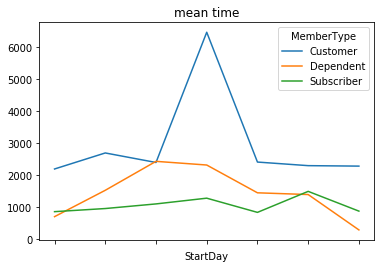

In [29]:
table.plot(title = 'mean time')


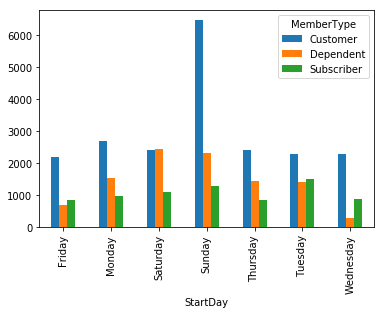

In [30]:
table.plot.bar()

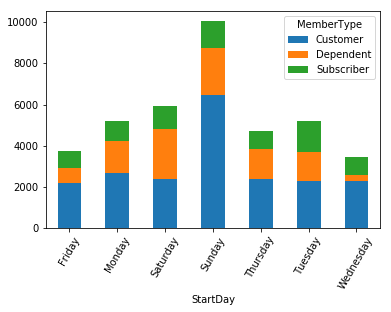

In [32]:
table.plot.bar(stacked = True, rot = 60)

In [38]:
# 占比图 axis1 是对横轴  1 是对行 0是对列 DataFrame对series的加减乘除
table1 =table.div(table.sum(1),axis = 0)

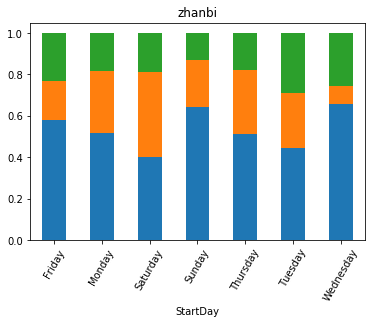

In [42]:
table1.plot.bar(stacked = True, legend =False, rot =60, title = 'zhanbi')

In [43]:
data.head()

,MemberType,TripDurationSec,StartDay,StartTime,StartDate,StartStationName,EndStationName
0,Subscriber,235.0,Tuesday,17,11,Market St & ML King Blvd,Market St & Cowart St
1,Subscriber,101.0,Tuesday,16,12,Market St & ML King Blvd,Market St & W 12th St
2,Subscriber,478.0,Wednesday,16,11,100 Walnut St,200 River St Outdoor Chattanooga
3,Customer,2399.0,Friday,00,11,215 Broad St,215 Broad St
4,Customer,3412.0,Saturday,19,12,High St & E 2nd St,High St & E 2nd St


# 一天24小时当中。三种客户累计骑行时间


In [45]:
data2 = data.pivot_table(values= 'TripDurationSec',
                      index = 'StartTime',
                      columns = 'MemberType',
                      aggfunc = np.sum)

In [61]:
data2

MemberType,Customer,Dependent,Subscriber
StartTime,,,
00,5901682.0,NaN,899877.0
01,3874096.0,429.0,527646.0
02,3016830.0,801.0,279130.0
03,1614528.0,NaN,133489.0
04,3664421.0,1455.0,93005.0
05,456947.0,NaN,110267.0
06,706535.0,NaN,283818.0
07,1514618.0,795.0,1005245.0
08,3827580.0,854.0,1566393.0


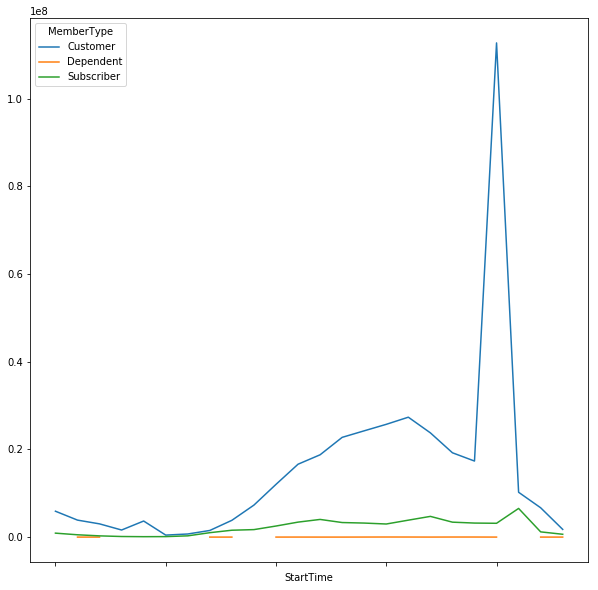

In [54]:
data2.plot(figsize =(10,10))

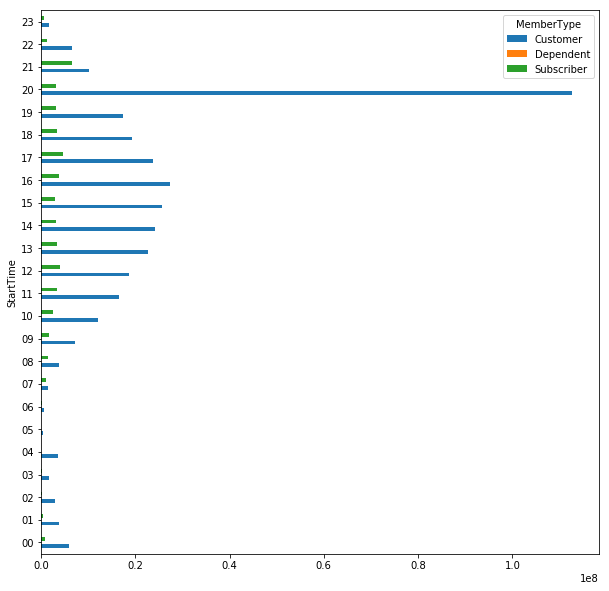

In [55]:
data2.plot.barh(figsize=(10,10))

# 车辆出入站数量统计计算

In [62]:
data.head()

,MemberType,TripDurationSec,StartDay,StartTime,StartDate,StartStationName,EndStationName
0,Subscriber,235.0,Tuesday,17,11,Market St & ML King Blvd,Market St & Cowart St
1,Subscriber,101.0,Tuesday,16,12,Market St & ML King Blvd,Market St & W 12th St
2,Subscriber,478.0,Wednesday,16,11,100 Walnut St,200 River St Outdoor Chattanooga
3,Customer,2399.0,Friday,00,11,215 Broad St,215 Broad St
4,Customer,3412.0,Saturday,19,12,High St & E 2nd St,High St & E 2nd St


In [63]:
number = data.StartStationName.value_counts() - data.EndStationName.value_counts()

NameError: name 'plt' is not defined

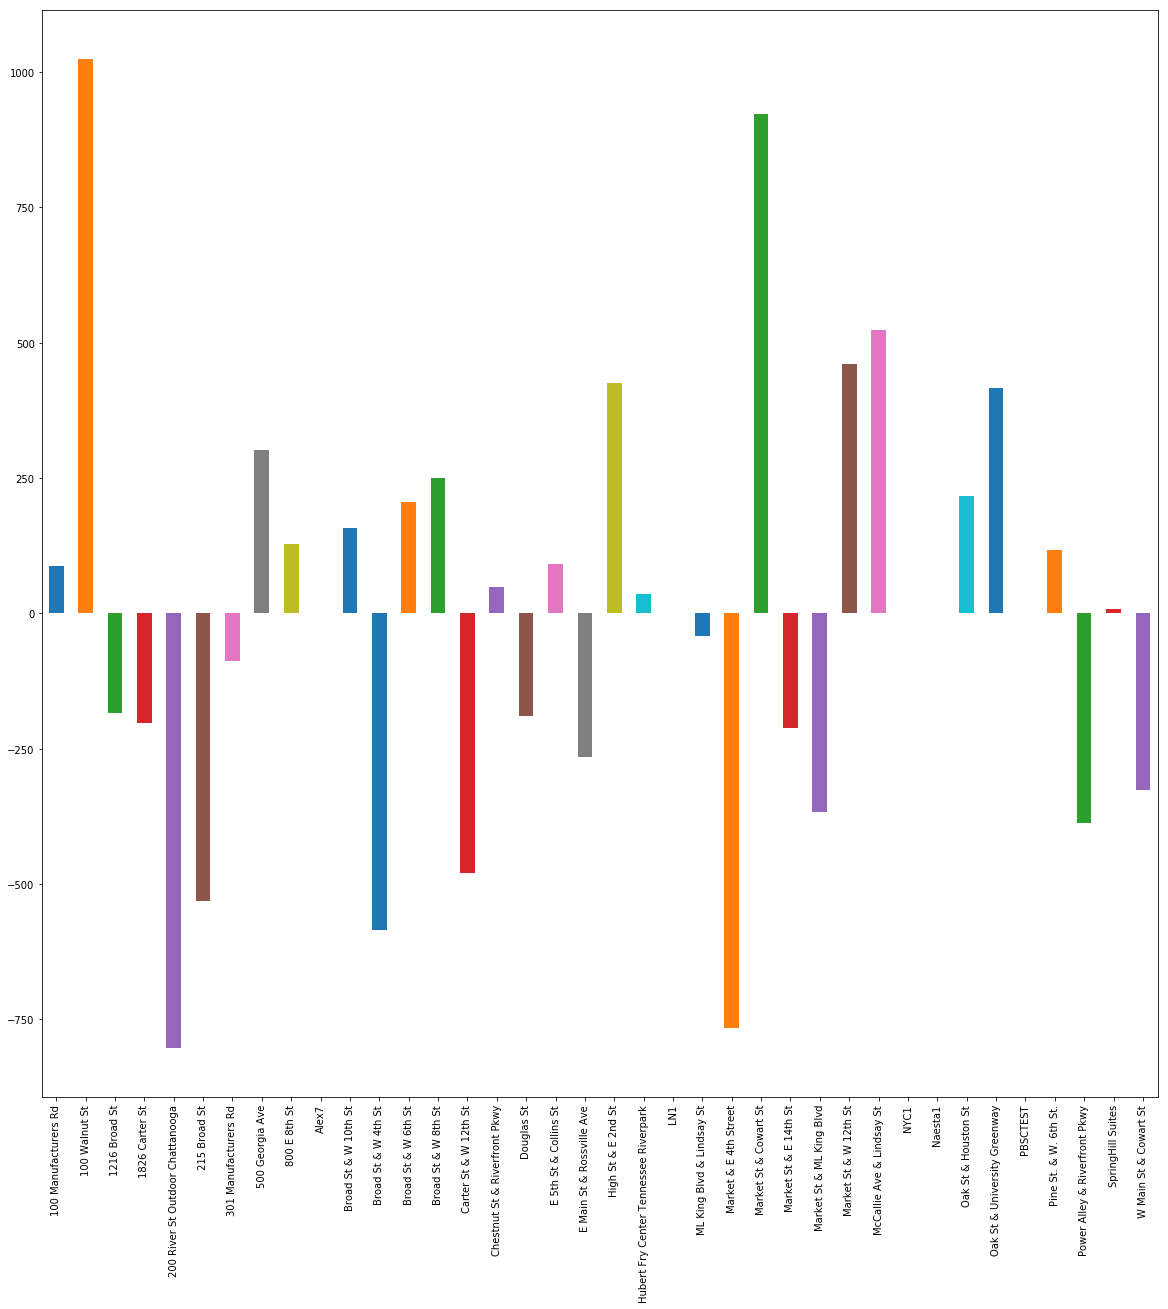

In [67]:
number.plot.bar(figsize = (20,20))
plt.axhline(0, color = 'k')  # k是黑色 axhline 加一条水平线

In [71]:
number[number < 0]

1216 Broad St                      -184.0
1826 Carter St                     -203.0
200 River St Outdoor Chattanooga   -802.0
215 Broad St                       -531.0
301 Manufacturers Rd                -87.0
Broad St & W 4th St                -584.0
Carter St & W 12th St              -480.0
Douglas St                         -189.0
E Main St & Rossville Ave          -265.0
ML King Blvd & Lindsay St           -41.0
Market & E 4th Street              -766.0
Market St & E 14th St              -211.0
Market St & ML King Blvd           -366.0
Power Alley & Riverfront Pkwy      -387.0
W Main St & Cowart St              -326.0
dtype: float64

In [72]:
data.head()

,MemberType,TripDurationSec,StartDay,StartTime,StartDate,StartStationName,EndStationName
0,Subscriber,235.0,Tuesday,17,11,Market St & ML King Blvd,Market St & Cowart St
1,Subscriber,101.0,Tuesday,16,12,Market St & ML King Blvd,Market St & W 12th St
2,Subscriber,478.0,Wednesday,16,11,100 Walnut St,200 River St Outdoor Chattanooga
3,Customer,2399.0,Friday,00,11,215 Broad St,215 Broad St
4,Customer,3412.0,Saturday,19,12,High St & E 2nd St,High St & E 2nd St


# pivot_table 可以使用层次化索引

In [79]:
cengci =  data.pivot_table('TripDurationSec',index= 'StartStationName'columns=['MemberType','StartDay'],aggfunc= np.size)

SyntaxError: invalid syntax (<ipython-input-79-638edfa4bd37>, line 1)